# Метод имитации отжига: задача о N ферзях

In [1]:
%matplotlib inline

import numpy as np 
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [2]:
def queens(N):
    ver = np.arange(1, N + 1)
    hor = np.arange(1, N + 1)
    return np.column_stack((ver, hor)) # получаем массив
    # размерности (N, 2), отождествляющий расположение ферзей на доске N x N

In [42]:
matrix = queens(8)
matrix

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8]])

In [4]:
def F(Q, N): # Q означает расположение ферзей
    cnt = 0
    for i in range(N):
        for j in range(i + 1, N):
            if abs(Q[i, 0] - Q[j, 0]) == abs(Q[i, 1] - Q[j, 1]): 
                cnt += 1
    return cnt * 2 # учитываем взаимные атаки

In [5]:
F(matrix, 8)

56

In [6]:
def G(Q, N):
    while True:
        i = rnd.randint(1, N)
        j = rnd.randint(1, N)
        if i != j:
            break
            
    k = Q[i - 1, 1]
    Q[i - 1, 1] = Q[j - 1, 1]
    Q[j - 1, 1] = k
    return Q # получаем новое расположение ферзей

In [7]:
def simulated_annealing(Q, T, alpha):
    N = np.shape(Q)[0] 
    x_hat = Q.copy() # сохраняем расположение ферзей для x_hat 
    
    while True:
        T *= alpha # понижаем температуру
        x_tilda = G(Q, N) # массив Q теперь содержет расположение  ферзей с попракой на x_tilda
        delta = F(x_tilda, N) - F(x_hat, N)
        if F(x_tilda, N) == 0: 
            return x_tilda
        elif delta < 0: 
            x_hat = x_tilda
        else:
            prob = np.exp(- delta / T)
            if prob > rnd.random():
                x_hat = x_tilda

Тогда одно из оптимальных решений выглядит следующим образом.

In [8]:
simulated_annealing(matrix, 100, 0.95)

array([[1, 6],
       [2, 3],
       [3, 7],
       [4, 2],
       [5, 8],
       [6, 5],
       [7, 1],
       [8, 4]])

Проверим скорость выполнения алгоритма.

In [96]:
timeit.timeit("""
import numpy as np 
import random as rnd

def queens(N):
    ver = np.arange(1, N + 1)
    hor = np.arange(1, N + 1)
    return np.column_stack((ver, hor)) # получаем массив
    # размерности (N, 2), отождествляющий расположение ферзей на доске N x N
    

def F(Q, N): # Q означает расположение ферзей
    cnt = 0
    for i in range(N):
        for j in range(i + 1, N):
            if abs(Q[i, 0] - Q[j, 0]) == abs(Q[i, 1] - Q[j, 1]): 
                cnt += 1
    return cnt * 2 # учитываем взаимные атаки
    

def G(Q, N):
    while True:
        i = rnd.randint(1, N)
        j = rnd.randint(1, N)
        if i != j:
            break
        
    k = Q[i - 1, 1]
    Q[i - 1, 1] = Q[j - 1, 1]
    Q[j - 1, 1] = k
    return Q # получаем новое расположение ферзей
    
  
  
def simulated_annealing(Q, T, alpha):
    N = np.shape(Q)[0] 
    x_hat = Q.copy() # сохраняем расположение ферзей для x_hat 
    
    while True:
        T *= alpha # понижаем температуру
        x_tilda = G(Q, N) # массив Q теперь содержет расположение  ферзей с попракой на x_tilda
        delta = F(x_tilda, N) - F(x_hat, N)
        if F(x_tilda, N) == 0: 
            return x_tilda
        elif delta < 0: 
            x_hat = x_tilda
        else:
            prob = np.exp(- delta / T)
            if prob > rnd.random():
                x_hat = x_tilda
                

matrix = queens(8)
simulated_annealing(matrix, 100, 0.9)                
""", number = 1000)

93.74985832099992

In [15]:
%timeit simulated_annealing(matrix, 100, 0.95)

53.2 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit simulated_annealing(matrix, 100, 0.9)

38 ms ± 9.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit simulated_annealing(matrix, 100, 0.8)

51.3 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit simulated_annealing(matrix, 100, 0.6)

49.4 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Посмотрим, как зависит скорость агоритма от параметра альфа.

In [24]:
def simulated_annealing_adj(Q, T, alpha):
    lst = list()
    N = np.shape(Q)[0]
    x_i = Q.copy() # сохраняем расположение ферзей для x_i 
    lst.append(F(x_i, N))
    while True:
        T *= alpha # понижаем температуру
        x_hat = G(Q, N) # массив Q теперь содержет расположение  ферзей с попракой на x_hat
        delta = F(x_hat, N) - F(x_i, N)
    
        if F(x_hat , N) == 0:
            lst.append(F(x_hat, N))
            return lst
        elif delta < 0: 
            x_i = x_hat
            lst.append(F(x_i, N))
        else:
            prob = np.exp(- delta / T) 
            if prob > rnd.random():
                x_i = x_hat
                lst.append(F(x_i, N))

In [68]:
a_matrix = matrix.copy()
b_matrix = matrix.copy()
c_matrix = matrix.copy()
d_matrix = matrix.copy()

In [44]:
a = simulated_annealing_adj(a_matrix, 100, 0.95)

In [69]:
b = simulated_annealing_adj(b_matrix, 100, 0.9)

In [61]:
c = simulated_annealing_adj(c_matrix, 100, 0.8)

In [53]:
d = simulated_annealing_adj(c_matrix, 100, 0.6)

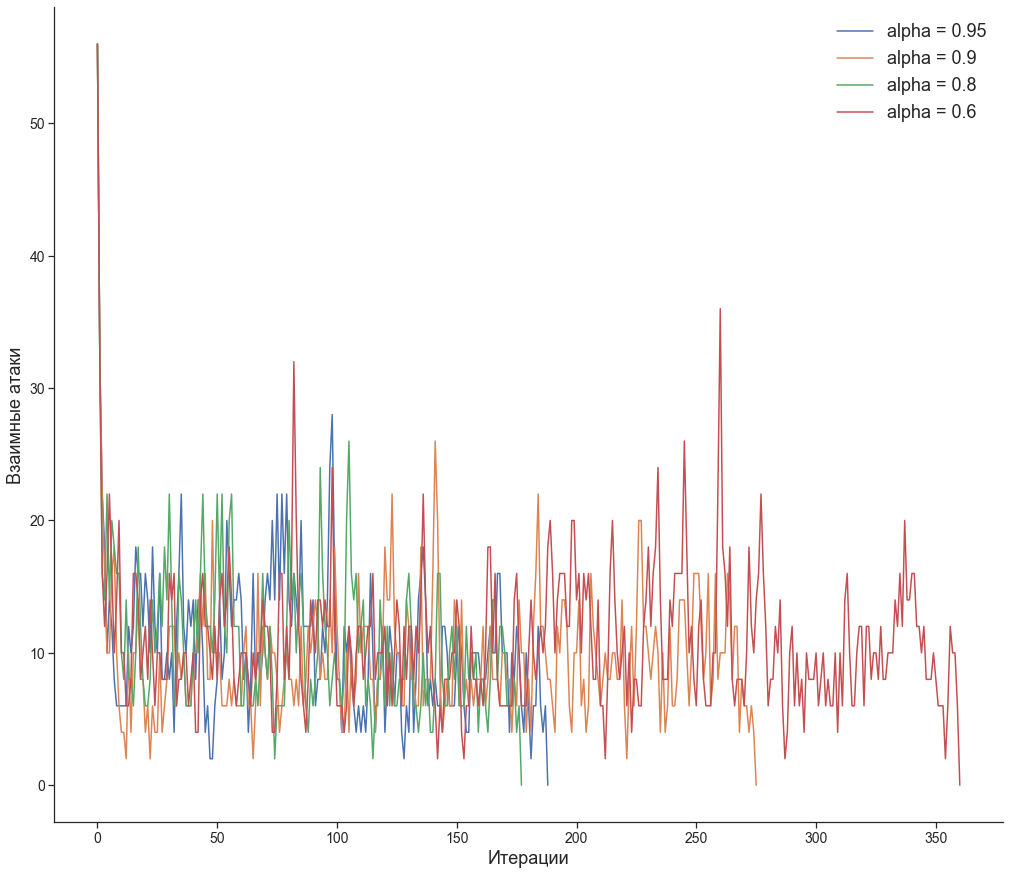

In [70]:
f = plt.figure(figsize=(17, 15))

# Remove the plot frame lines. They are unnecessary chartjunk.
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.
plt.xlabel("Итерации", fontsize=18)  
plt.ylabel("Взаимные атаки", fontsize=18) 

plt.plot(a, label="alpha = 0.95") 
plt.plot(b, label="alpha = 0.9") 
plt.plot(c, label="alpha = 0.8") 
plt.plot(d, label="alpha = 0.6") 
plt.legend(frameon=False, fontsize=18) 

sns.set()
sns.set_style("white")

Но не стоит забывать, что тут имеет место стохастика — может быть при альфа 0.9 250, а может и 1000 

In [71]:
f.savefig("queens.png", bbox_inches='tight', dpi=600)